In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

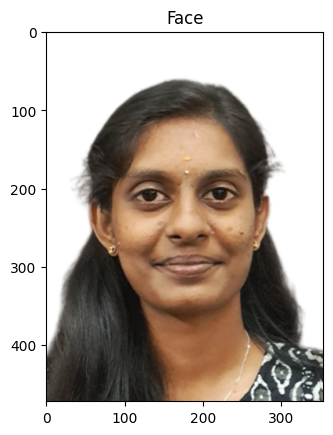

In [41]:
# Load the Face Image
faceImage = cv2.imread('cvv.png')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")


In [42]:
faceImage.shape

(472, 354, 3)

In [43]:
#resized_faceImage.shape
faceImage.shape

(472, 354, 3)

Text(0.5, 1.0, 'glassPNG')

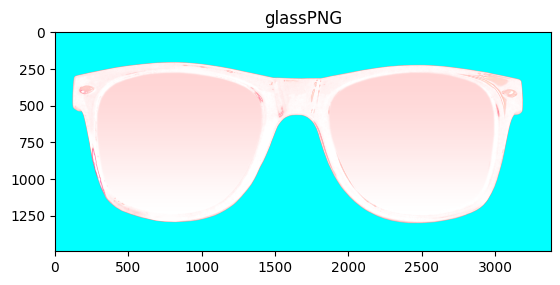

In [118]:
glassPNG = cv2.imread('glass.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")

In [166]:
# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(190,50))
print("image Dimension ={}".format(glassPNG.shape))

image Dimension =(50, 190, 4)


In [165]:
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

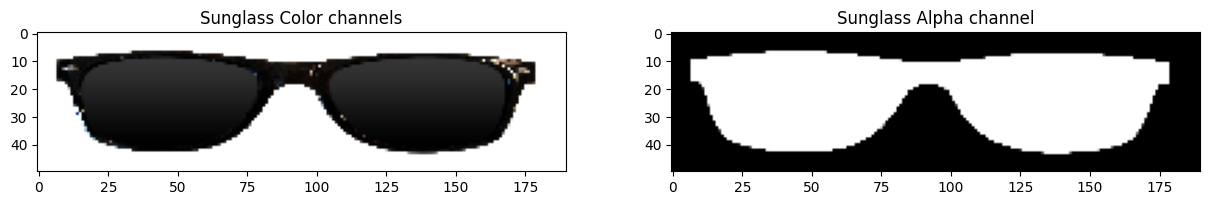

In [164]:
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

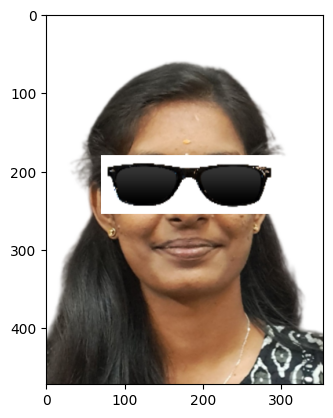

In [254]:
faceWithGlassesNaive = faceImage.copy()
y1, y2 = 180, 255   
x1, x2 = 70, 300   
glassResized = cv2.resize(glassBGR, (x2 - x1, y2 - y1))  
faceWithGlassesNaive[y1:y2, x1:x2] = glassResized
plt.imshow(faceWithGlassesNaive[..., ::-1])

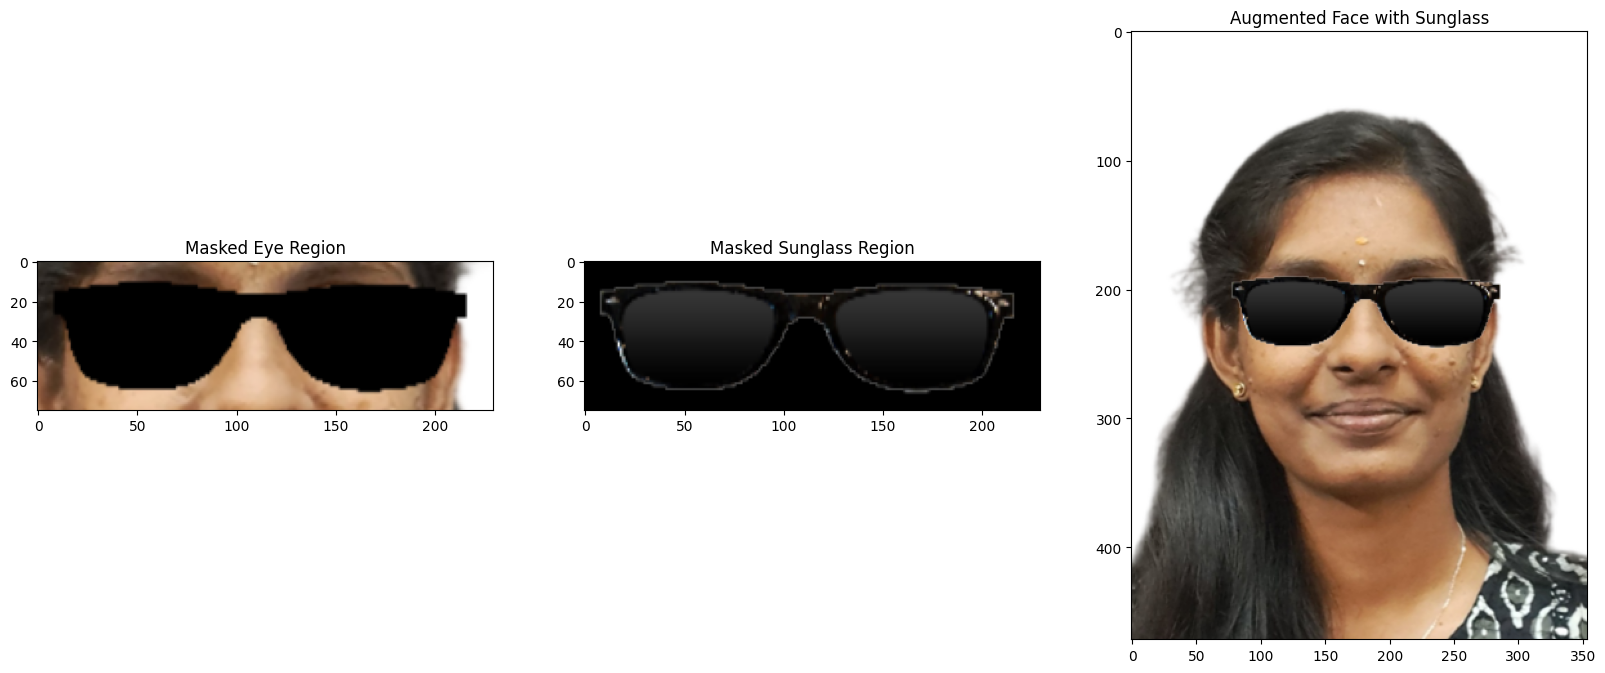

In [266]:
y1, y2 = 180, 255   
x1, x2 = 70, 300   

eyeROI = faceImage[y1:y2, x1:x2]

glassResized   = cv2.resize(glassBGR, (x2 - x1, y2 - y1))       
glassMask1Resized = cv2.resize(glassMask1, (x2 - x1, y2 - y1))   

glassMask = cv2.merge([glassMask1Resized]*3).astype(np.float32) / 255.0

eyeROI_f      = eyeROI.astype(np.float32)
glassResized_f = glassResized.astype(np.float32)

maskedEye   = cv2.multiply(eyeROI_f, (1.0 - glassMask))
maskedGlass = cv2.multiply(glassResized_f, glassMask)

eyeRoiFinal = cv2.add(maskedEye, maskedGlass).astype(np.uint8)

faceWithGlassesArithmetic = faceImage.copy()
faceWithGlassesArithmetic[y1:y2, x1:x2] = eyeRoiFinal

plt.figure(figsize=[20,20])
plt.subplot(131); plt.imshow(maskedEye[..., ::-1].astype(np.uint8)); plt.title("Masked Eye Region")
plt.subplot(132); plt.imshow(maskedGlass[..., ::-1].astype(np.uint8)); plt.title("Masked Sunglass Region")
plt.subplot(133); plt.imshow(faceWithGlassesArithmetic[..., ::-1]); plt.title("Augmented Face with Sunglass")
plt.show()


Text(0.5, 1.0, 'With Sunglass')

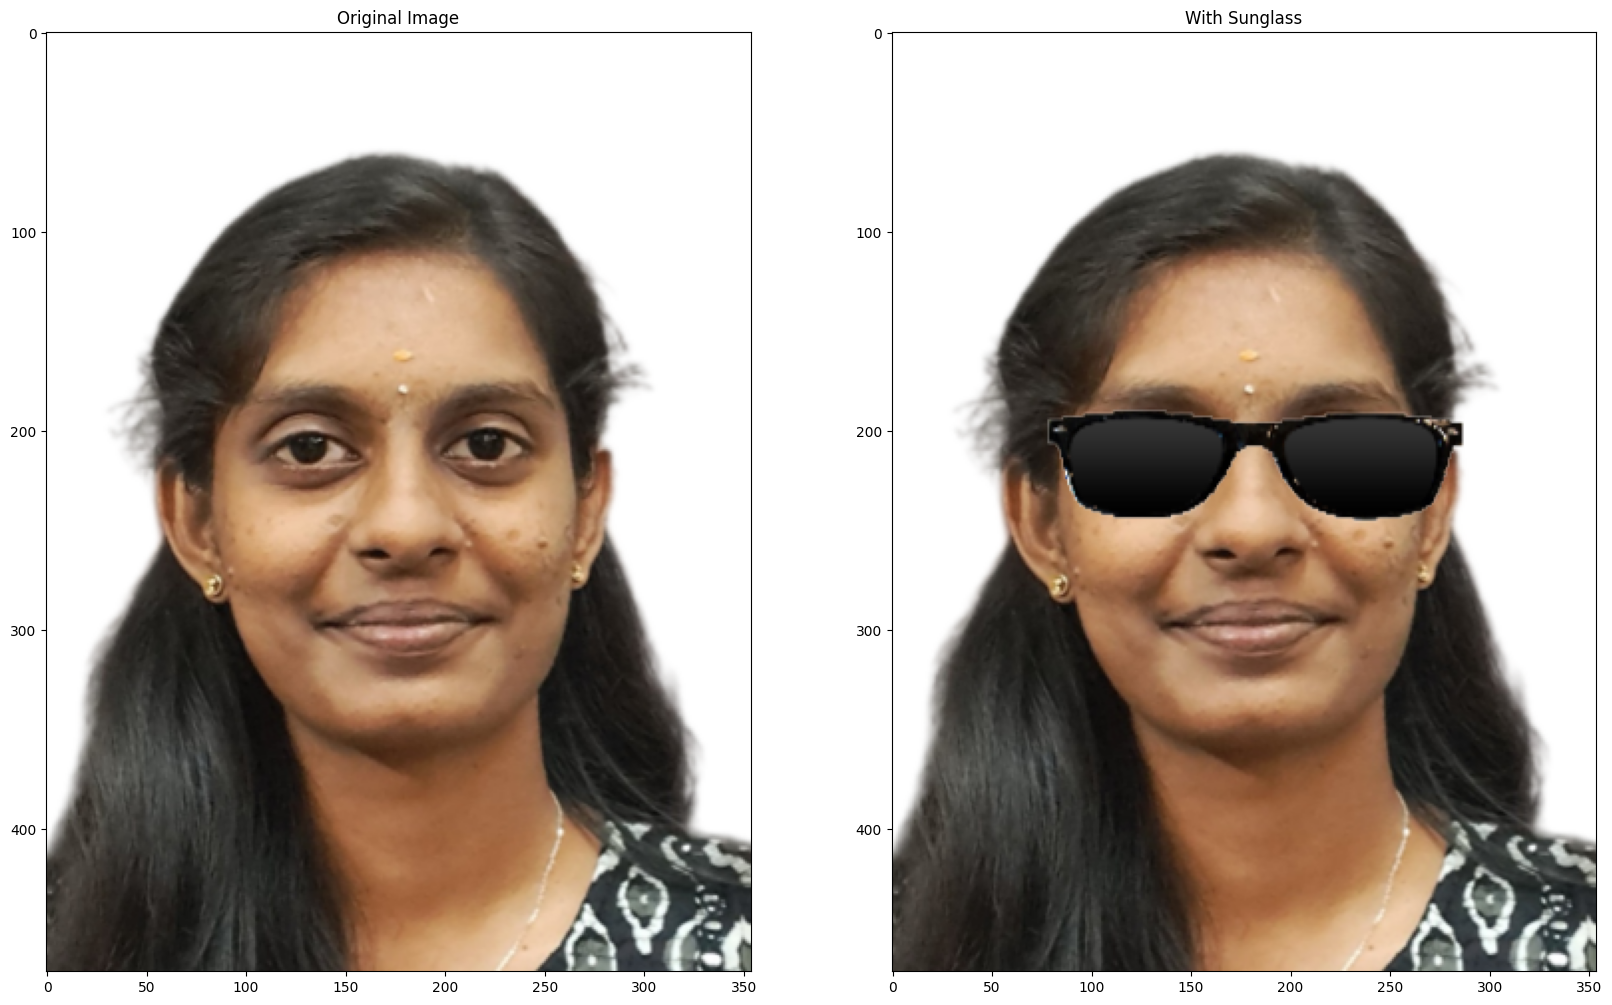

In [267]:
faceWithGlassesArithmetic[180:255,70:300] = eyeRoiFinal
plt.figure(figsize=[20,20])
plt.subplot(121); plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image")
plt.subplot(122); plt.imshow(faceWithGlassesArithmetic[:,:,::-1]); plt.title("With Sunglass")